# Project 2 - Diabetes Prediction of Pima Indian Women

# By Nnamdi Nwankwo
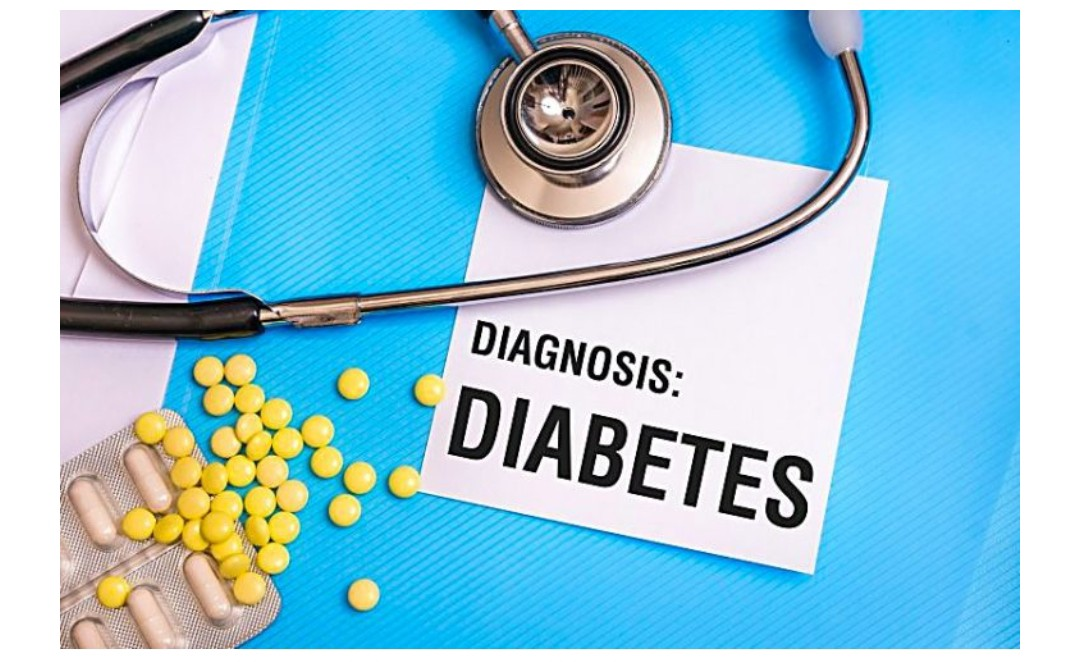




















The dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases



# Objective

The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset and analyze various approach to boost performance and accuracy. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).
 


# Introduction
Diabetes is a condition that happens when your blood Sugar (glucose) is too high. It develops when your pancreas doesnt make enough insulin or any at all, or when your body isn't responding to the effects of insulin properly. Diabetes affects all ages. Most forms of Diabetes are chronic(lifelong) and all forms are manageable with medications and/or lifestyle changes. Early detection may forestall its advancement hence preventing other complications.

In this Dataset we were provided with the following health-related predictor features/variables with a target variable:-

. Pregnancies:- Number of times pregnant

. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

. BloodPressure: Diastolic blood pressure (mm Hg)

. SkinThickness: Triceps skin fold thickness (mm)

. Insulin: 2-Hour serum insulin (mu U/ml)

. BMI: Body mass index (weight in kg/(height in m)^2)


. DiabetesPedigreeFunction: Diabetes pedigree function

. Age: Age (years)

. Outcome: Class variable (0 = Person doesn't have diabetes or 1 = Person has diabetes). This is the target variable


# Loading the Data

In [44]:
#Importing Required Libraries for processing and Data Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#dealing with warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Loading the dataset
Diabetes_Data = pd.read_csv(r"C:\Users\CELEBOBO COMPUTERS\Downloads\Datasets\Nnamdi Datasc Projects\diabetes.csv")

#Having a look at the dataset
Diabetes_Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Validation

In [46]:
Diabetes_Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
Diabetes_Data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [48]:
#making a copy of the dataset
Diabetes_Data2 = Diabetes_Data.copy()

#Size of dataset
Diabetes_Data2.shape

(768, 9)

In [49]:
#A brief summary of the dataset
Diabetes_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
#statistical summary of the data
Diabetes_Data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
#checking for missing/null values
Diabetes_Data2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
#checking for duplicates
Diabetes_Data2.duplicated().sum()

0

# Data Exploration

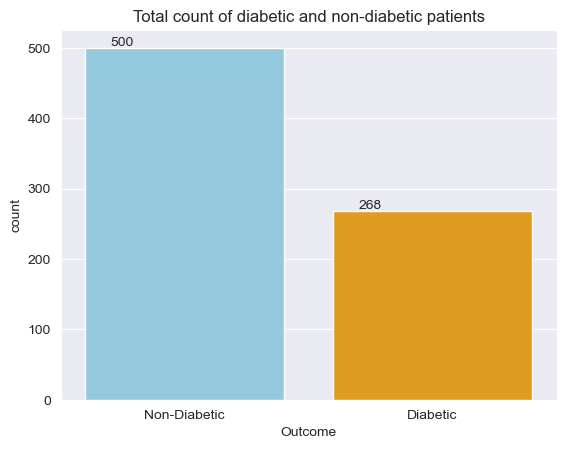

In [53]:
#Number of Diabetic and Non-Diabetic Patients

sns.set_style('darkgrid')
labels = ['Non-Diabetic', 'Diabetic']
ax=sns.countplot(x = "Outcome", palette={'orange', 'skyblue'}, data = Diabetes_Data2)
ax.set_xticklabels(labels)
ax.set_title("Total count of diabetic and non-diabetic patients")

for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+3)) 

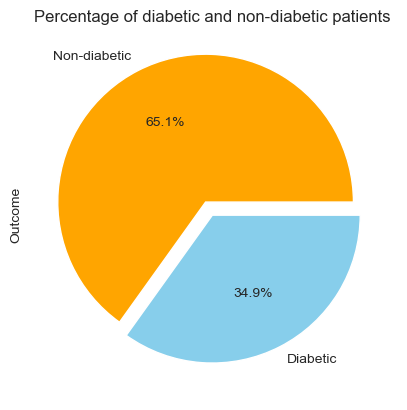

In [54]:
#Percentage of Diabetic to Non-Diabetic Patients

colors = ['orange','skyblue']
plt.title('Percentage of diabetic and non-diabetic patients')
Diabetes_Data2["Outcome"].value_counts().plot(kind='pie', labels = ['Non-diabetic', 'Diabetic'], explode=[0.1,0], colors=colors, autopct='%1.1f%%')
plt.show()

''

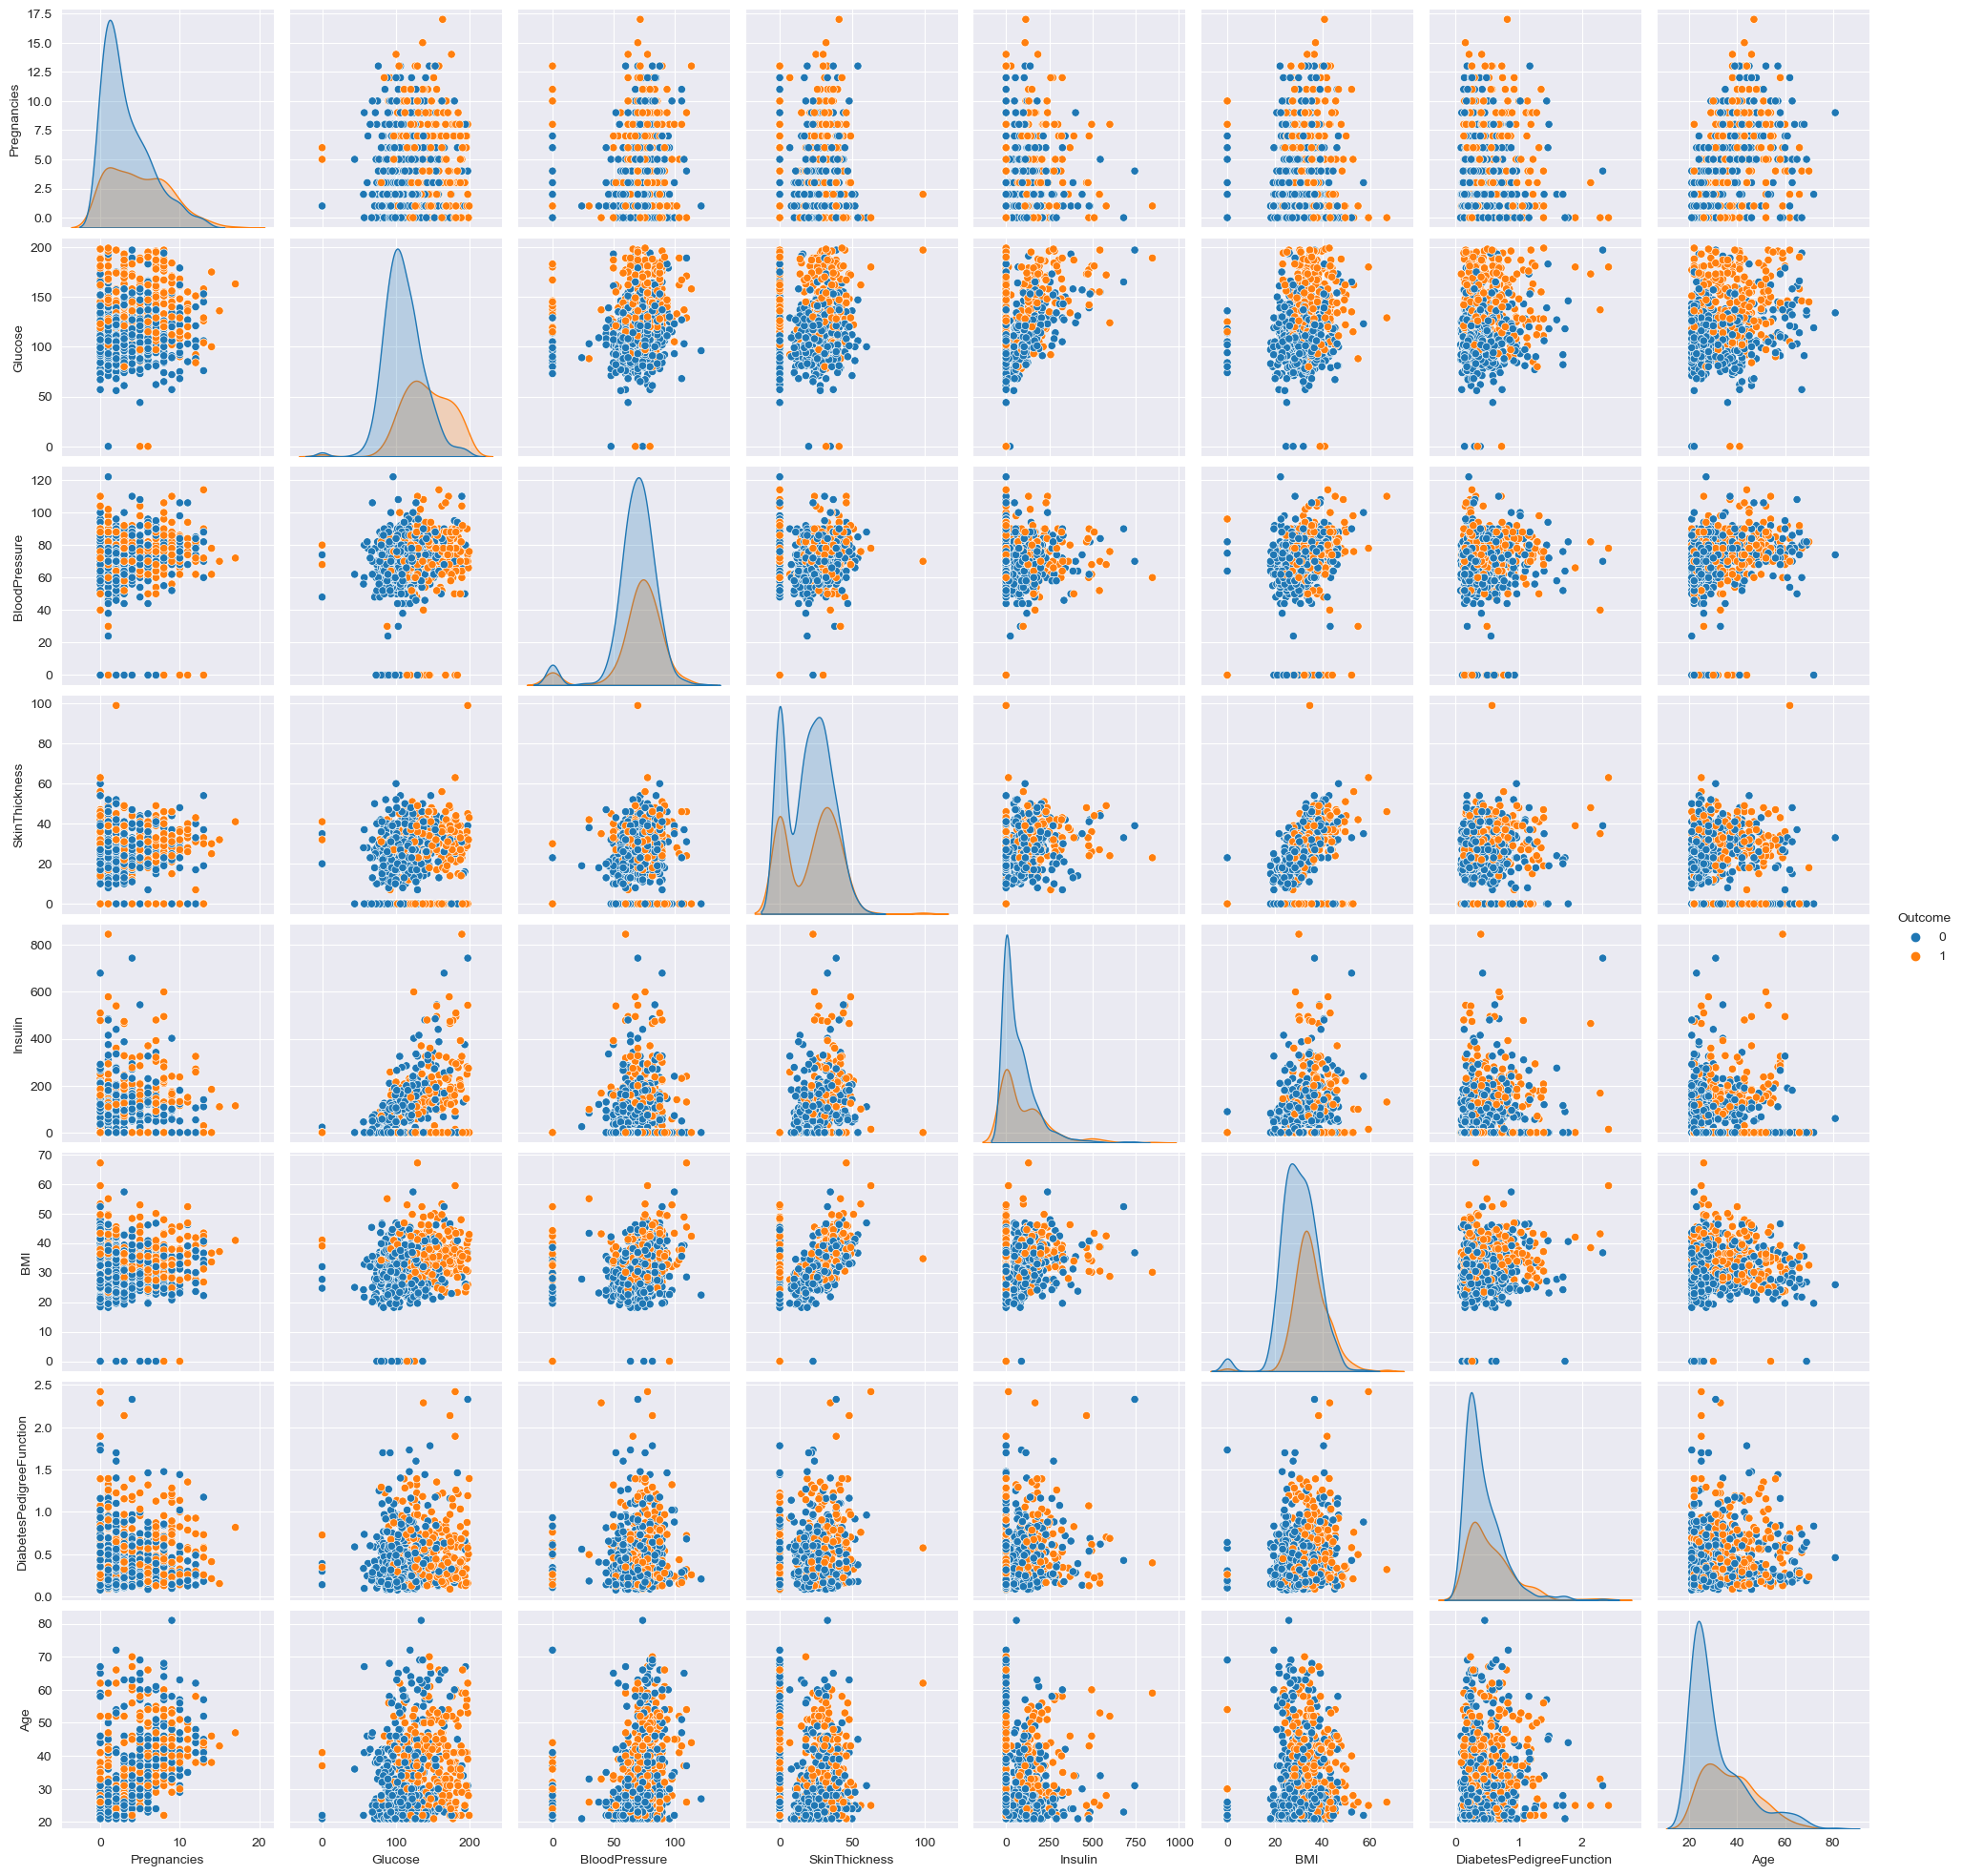

In [55]:
#Visualizing the multidimensional relationships among the Features
sns.pairplot(Diabetes_Data2, hue='Outcome', height=2.5);''

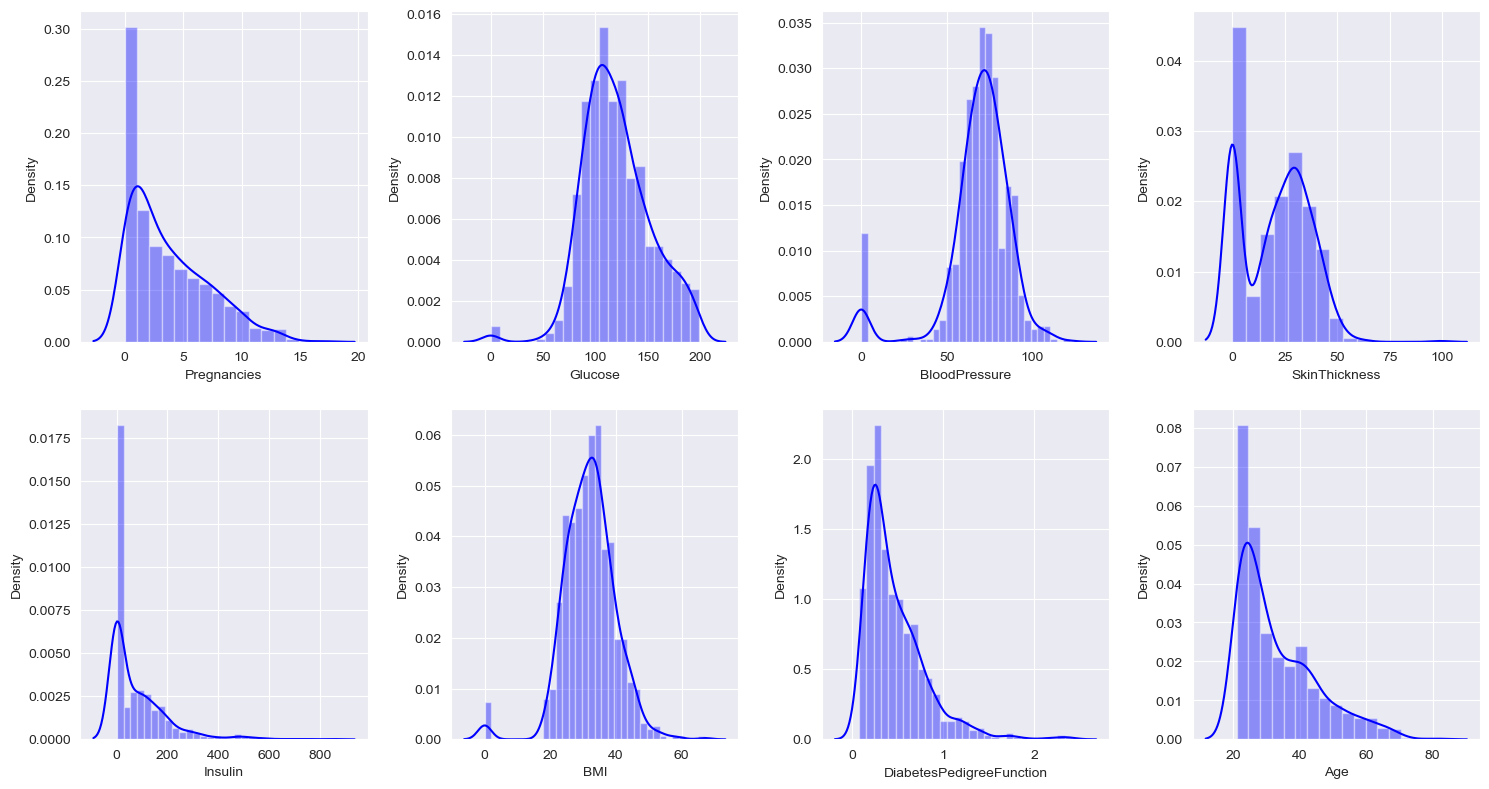

In [56]:
#distribution of the features

fig, axes = plt.subplots(2,4, figsize=(15, 8))
ax = axes.flatten()

for x, col in enumerate(Diabetes_Data2.columns[:-1]):
    sns.distplot(Diabetes_Data2[col], ax=ax[x], color='blue')

fig.tight_layout(w_pad=1.5, h_pad=2)
plt.show()



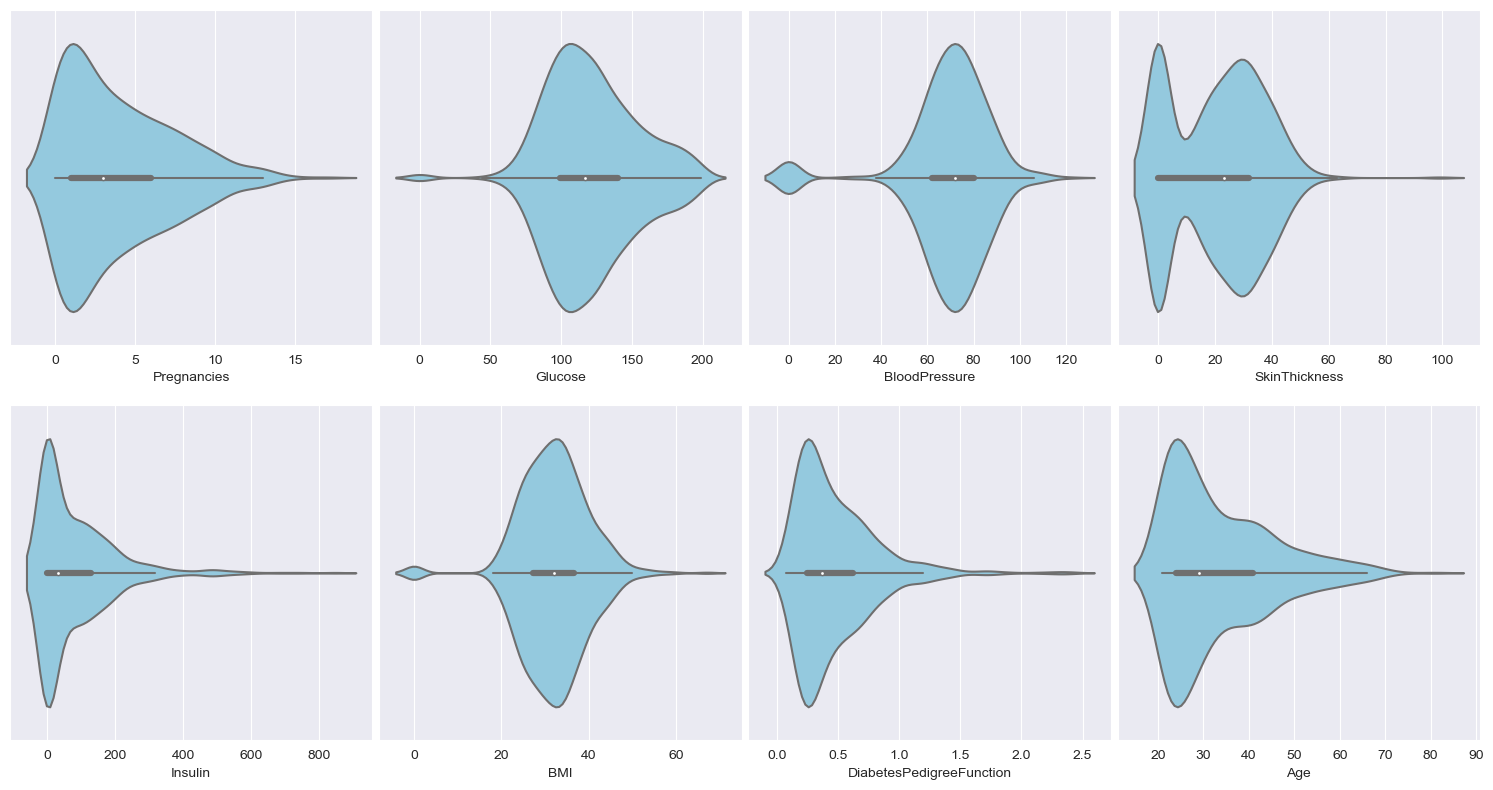

In [57]:
#Distribution of the features using violin plot

fig, axes = plt.subplots(2,4, figsize=(15, 8))
ax = axes.flatten()

for x, col in enumerate(Diabetes_Data2.columns[:-1]):
    sns.violinplot(Diabetes_Data2[col], ax=ax[x], color = 'skyblue')

fig.tight_layout(w_pad=0.5, h_pad=1.5)
plt.show()


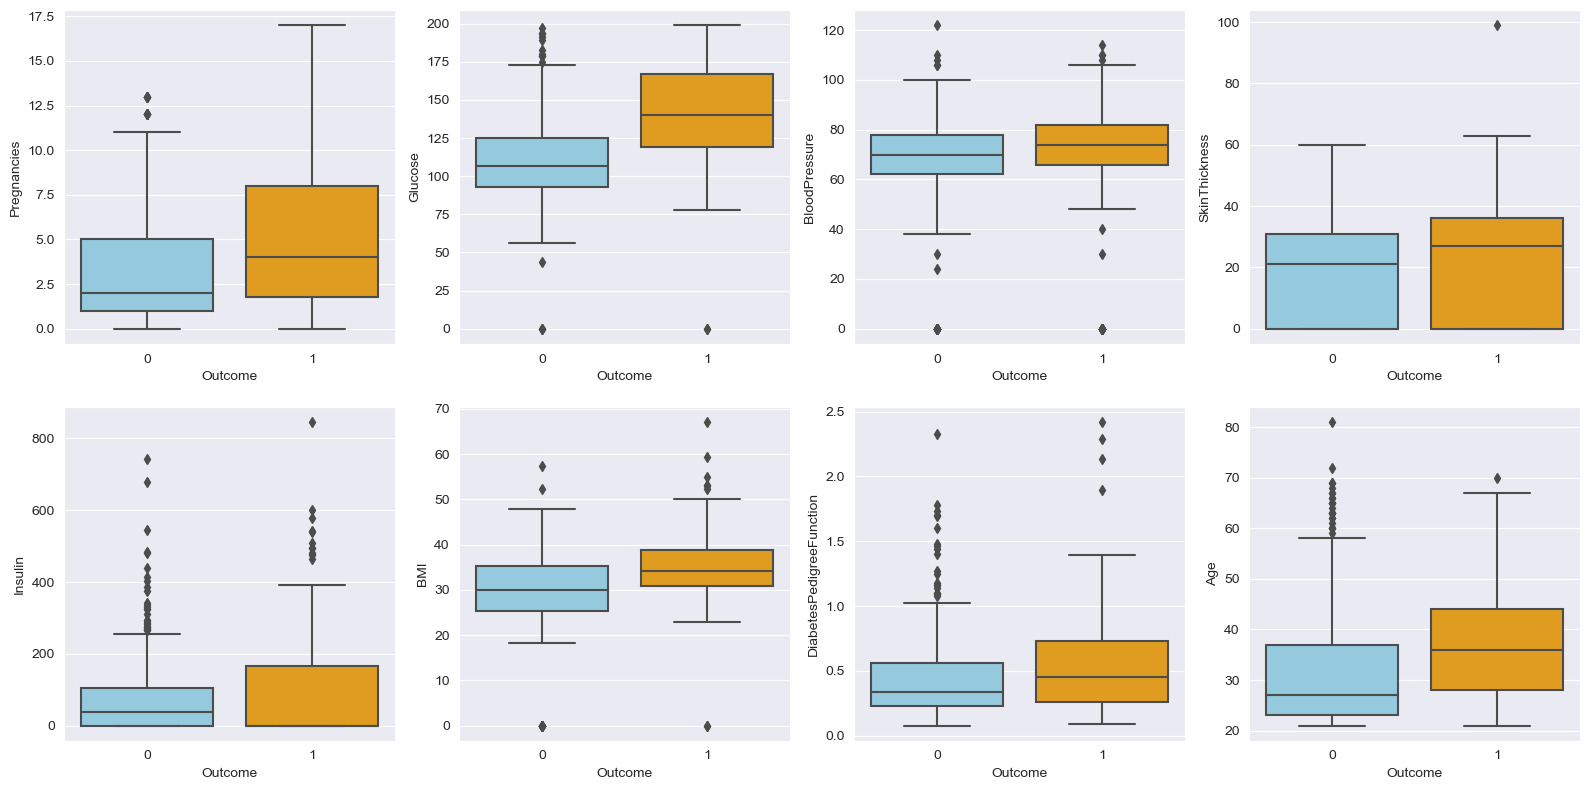

In [58]:
#Relationship with the Features and Diabetic Status

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Generate plots for each column
for i, column in enumerate(numerical_features):
    sns.boxplot(x='Outcome', y=column, palette={'orange', 'skyblue'}, data=Diabetes_Data2, ax=axes[i//4][i%4])

# Adjust the layout and display the plots
fig.tight_layout(w_pad=1, h_pad=1.5)
plt.show()

In [59]:
#showing the correlation in the numerical features
Diabetes_Data2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

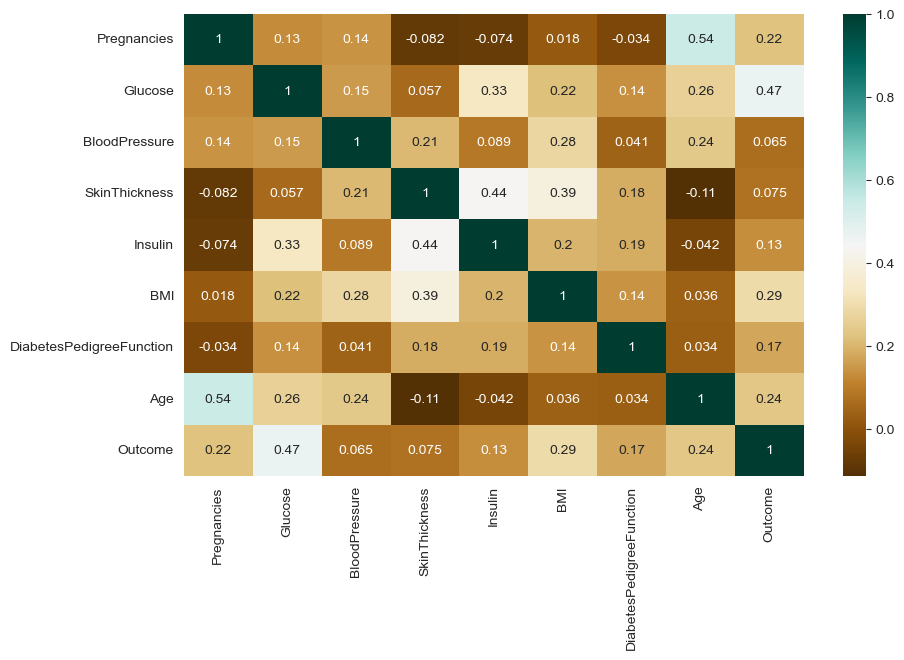

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(Diabetes_Data2.corr(), annot=True, cmap='BrBG')

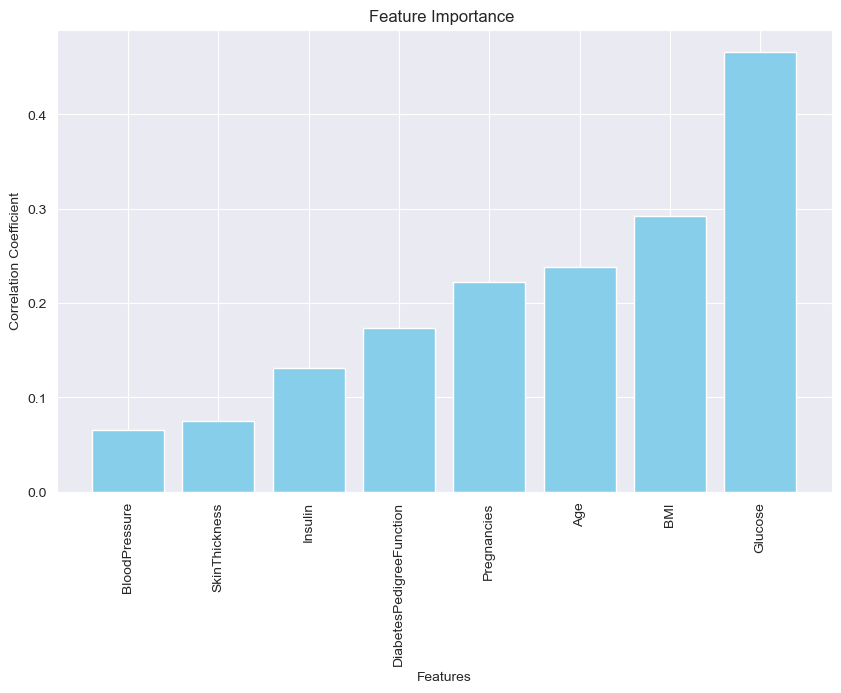

In [61]:
#Which Feature is more important in predicting diabetes Outcome


# Compute the correlation between each feature and the label/target feature
correlation = Diabetes_Data2.corr()["Outcome"].drop("Outcome")

# Sort the features based on their correlation with the label feature
sorted_features = correlation.sort_values(ascending=True)

# Plot the feature importance chart using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_features.index, sorted_features.values, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.title("Feature Importance ")
plt.xticks(rotation=90)
plt.show()

# Model building and Data preprocessing

In [62]:
#Importing Machine learning Models
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [63]:
#splitting the data into features and labels
X = Diabetes_Data2.drop(["Outcome"], axis= "columns") # droping the label variable (Outcome)

y = Diabetes_Data2["Outcome"]


In [64]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [65]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Model Building

In [66]:
#Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1234)

# Logistic Regression

In [67]:
#Importing logistic regression from Sklearn module
from sklearn.linear_model import LogisticRegression

In [68]:
#training the model
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [69]:
#prediction using the feature from test data
log_reg.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [70]:
#saving the prediction
logistic_prediction = log_reg.predict(X_test)

In [71]:
#preparing a confusion matrix to evaluate classification algorithms
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    
    from sklearn.metrics import confusion_matrix
   
    
    cm = confusion_matrix(ytest, ypred)
    
    plt.figure(figsize=(7, 5))
    
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues_r')
    
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)

    plt.yticks([0.5, 1.5], label)    
    plt.ylabel('Truth', fontsize = 13)
    
    plt.title('A confusion matrix');

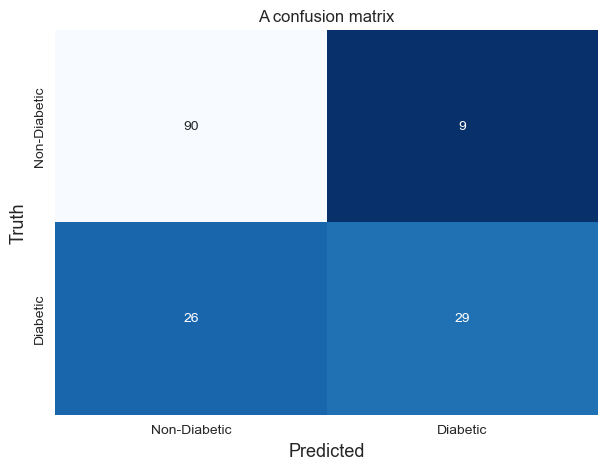

In [72]:
ConfusionMatrix(y_test, logistic_prediction, label= ["Non-Diabetic", "Diabetic"])

.There are 90 True Negatives (TN): predicting that a Patient will not have Diabetes and truly a patient did not have diabetes

.There are 29 True positives (TP): predicting that a Patient will have diabetes and a patient actually has diabetes 

.There are 26 False Negatives (FN): predicting that a Patient will not have Diabetes and a Patient actually has Diabetes 

.There are 9 False Positives (FP): predicting that a Patient will have Diabetes and a Patient did not have Diabetes

In [73]:
#Evaluation Metrics

#Checking the accuracy
Accuracy=metrics.accuracy_score(y_test, logistic_prediction) * 100
Accuracy

77.27272727272727

In [74]:
#checking the F1 score
f1score=metrics.f1_score(y_test, logistic_prediction)*100
f1score

62.365591397849464

The accuracy score of the model is 77.3% while the f1 score is 62%

# Random Forest Model

In [75]:
#Importing Random Forest model from Sklearn module
from sklearn.ensemble import RandomForestClassifier

#training the model
randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
#Prediction
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [77]:
randomforestmodel_prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

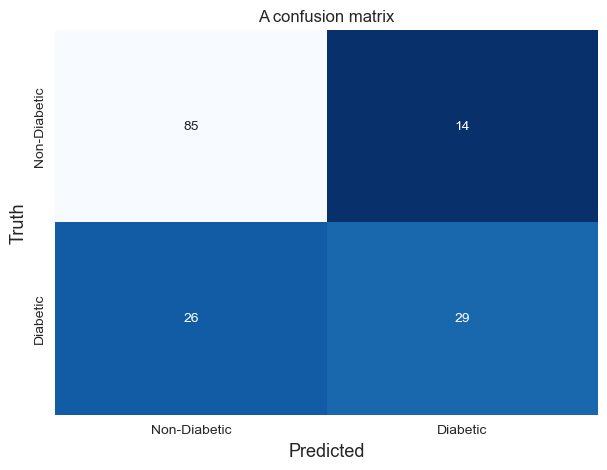

In [78]:
#Model performance
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ["Non-Diabetic", "Diabetic"])

There are 87 True Negatives (TN): predicting that a Patient will not have Diabetes and truly a patient did not have diabetes

.There are 28 True positives (TP): predicting that a Patient will have diabetes and a patient actually has diabetes 

.There are 27 False Negatives (FN): predicting that a Patient will not have Diabetes and a Patient actually has Diabetes 

.There are 12 False Positives (FP): predicting that a Patient will have Diabetes and a Patient did not have Diabetes

In [79]:
#Checking the accuracy
Accuracy=metrics.accuracy_score(y_test, randomforestmodel_prediction)*100
Accuracy

74.02597402597402

In [80]:
#checking the F1 score
f1score=metrics.f1_score(y_test, randomforestmodel_prediction)*100
f1score

59.183673469387756

The accuracy score of the model is 75.3% while the f1 score is 61%

# Naive Bayes model

In [81]:
#Importing Naive Model From SKlearn module
from sklearn.naive_bayes import GaussianNB

#Training the model
naivemodel = GaussianNB()

naivemodel.fit(X_train, y_train)

GaussianNB()

In [82]:
#Prediction
naivemodel_prediction = naivemodel.predict(X_test)

In [83]:
naivemodel_prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

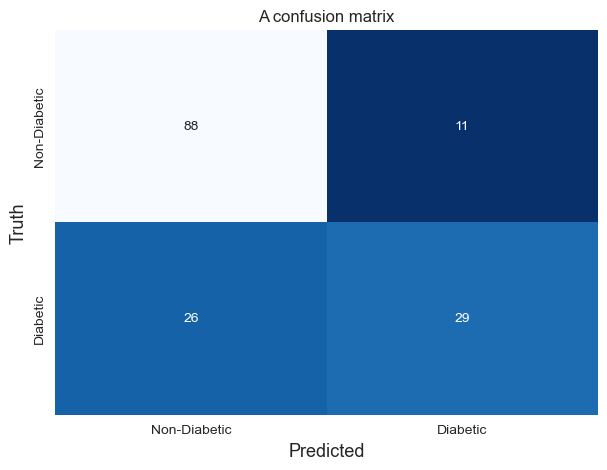

In [84]:
#Model performance
ConfusionMatrix(y_test, naivemodel_prediction, label= ["Non-Diabetic", "Diabetic"])

There are 88 True Negatives (TN): predicting that a Patient will not have Diabetes and truly a patient did not have diabetes

.There are 29 True positives (TP): predicting that a Patient will have diabetes and a patient actually has diabetes 

.There are 26 False Negatives (FN): predicting that a Patient will not have Diabetes and a Patient actually has Diabetes 

.There are 11 False Positives (FP): predicting that a Patient will have Diabetes and a Patient did not have Diabetes

In [85]:
#Accuracy Score
Accuracy=metrics.accuracy_score(y_test, naivemodel_prediction)*100
Accuracy

75.97402597402598

In [86]:
#F1 score
f1score=metrics.f1_score(y_test, naivemodel_prediction)*100
f1score

61.052631578947356

The accuracy score of the model is 76% while the f1 score is 61%

# Conclusion

Having trained the Three (3) models, it can be observed that the best model that can give better prediction whether a patient has Diabetes or not is Logistic Regression. It has a better accuracy and f1 score combination compared to other models

# Summary

. Glucose appears to be the most important feature in predicting diabetes Outcome

. Glucose and BMI has stronger positive correlation with Diabetes Outcome, Higher Blood Glucose level is associated with higher risk of having Diabetes. So monitoring the blood glucose level frequently will help reduce risks

. People with higher BMI are more likely to develop diabetes than those with lower BMI. Maintaining a moderate weight and making certain lifestyle adjustments can help slow or prevent diabetes

. Age is a significant factor in the development of diabetes. The risk of developing diabetes increases with age

. Higher number of Pregnancy increases the risk for diabetes because of the changes that occur in the body during pregnancy. These changes include weight gain and increased hormone production. Women who have previously experienced gestational diabetes are at a higher risk of developing diabetes.

. Diabetes Pedigree Function provides information on the genetic relationship and diabetes history of relatives to the patients. A higher Pedigree Function means the patient is more likely to have diabetes.

. Insulin is a hormone that helps the body use and store sugar from food. Ineffective use of Insulin or Undersecretion of insulin by the body Increases the risk of having Diabetes 

. Diabetes can affect many parts of your body, including your skin. Skin changes are one of the most common signs of diabetes

. High blood pressure is associated with Diabetes. Checking and monitoring the blood pressure Frequently will help reduce risks and complications associated with Diabetes

